In [3]:
from qwak.qwak import QWAK

In [4]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm

In [5]:
def stream_path(n,alpha):
    B = np.matrix(np.zeros((n,n), dtype='complex'))
    for x in range(n-1):
        B[x,x+1] = np.exp(1j*alpha)

    return B + B.H

def inf_line_bessel(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        psi[x,0] = 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += 1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)

    return np.abs(np.array(psi))**2

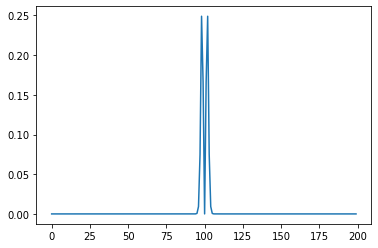

In [6]:
n=200
x0 = 0
n1 = 100
t  = 20
alpha=np.pi/2
# print(stream_path(n,alpha))
# print()
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha)
    mat = np.matrix(d["weight"])

graph = nx.compose(H,G)

qw2 = QWAK(graph)
qw2.runWalk(1,[n//2-1,n//2 +1])
plt.plot(qw2.getProbDistVec())
# print(qw2.getAdjacencyMatrix())
# print()
# print(np.matrix(qw2.getAdjacencyMatrix()).round(decimals=0) == np.matrix(stream_path(n,alpha)).round(decimals=0))

# psi_bessel = inf_line_bessel(x0,n1,t,alpha)
# plt.plot(psi_bessel)

In [1]:
def inf_line_bessel_oriented(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        psi[x,0] = (np.exp(-1j*alpha/2))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += (np.exp(1j*alpha/2))*1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)
        
    return np.abs(np.array(psi))**2

def inf_line_bessel_oriented2(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        -1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)**2

                       - 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)**2

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

    return prob

def psi_bessel(x0,nx,t,alpha,x):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    psi[x,0] = (1/np.sqrt(2)) * (np.exp(-1j*alpha*(x+x0))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t) + np.exp(-1j*alpha*(x-x0))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))
    return psi

def psi_bessel_conjugate(x0,nx,t,alpha,x):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    psi[x,0] = np.conjugate((1/np.sqrt(2)) * (np.exp(-1j*alpha*(x+x0))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t) + np.exp(-1j*alpha*(x-x0))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)))
    return psi

def inf_line_bessel_oriented3(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        print(psi_bessel(x0,nx,t,alpha,x))
        print(psi_bessel_conjugate(x0,nx,t,alpha,x))
        prob[x,0] = psi_bessel(x0,nx,t,alpha,x)[x,0] * psi_bessel_conjugate(x0,nx,t,alpha,x)[x,0]
    return prob

In [2]:
x0 = 100
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented(x0,n0,t,alpha)
plt.plot(psi_oriented)

NameError: name 'np' is not defined

In [ ]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented2(x0,n0,t,alpha)
plt.plot(psi_oriented)

[[-3.90284609e-45+4.00438794e-29j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.

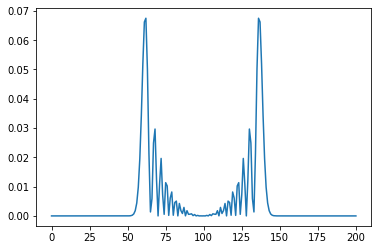

In [31]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented3(x0,n0,t,alpha)
plt.plot(psi_oriented)


In [9]:
n = 10
alpha=np.pi/2
# print(stream_path(n,alpha))
# print()
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha)
    mat = np.matrix(d["weight"])

graph = nx.compose(H,G)

[[7.98309686e-33]
 [6.37344737e-32]
 [2.29130469e-32]
 [5.00000000e-01]
 [6.96498564e-32]
 [5.00000000e-01]
 [5.17639749e-32]
 [5.51017824e-32]
 [1.97604257e-31]
 [2.04671261e-32]]


NameError: name 'psi_oriented' is not defined

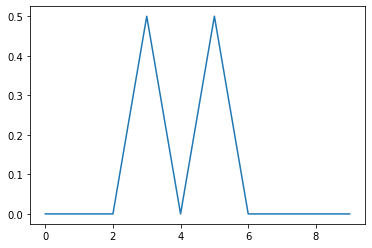

In [15]:
qw3 = QWAK(graph)
qw3.runWalk(0,[3,5])
plt.plot(qw3.getProbDistVec())
print(qw3.getProbDistVec())
print(qw3.getProbDistVec().round(decimals=0) == psi_oriented.round(decimals=0))


In [ ]:
# print(qw2.getProbDistVec().round(decimals=0) == psi_oriented.round(decimals=0))


In [39]:
def inf_line_bessel_oriented5(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

                       + 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0),2*t))

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

    return prob

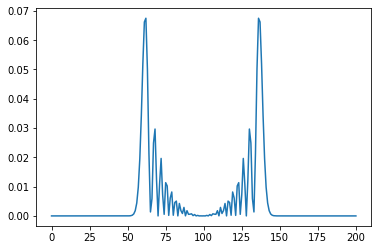

In [40]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented5(x0,n0,t,alpha)
plt.plot(psi_oriented)